In [1]:
import re
import unicodedata
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import prepare

print('Success')

Success


# Spam Data



In [2]:
help(prepare)

Help on module prepare:

NAME
    prepare

FUNCTIONS
    basic_clean(somestring)
        Take in a string and performs a basic clean by converting it to all lower case letters,
        and then normalizes the encoding and removes an character that isn't a letter, number, and a space.
        Returns the result.
    
    lemmatize(somestring)
        Creates a lemmatize object and then uses it to lemmatize the provided string. Returns the string stemmed
    
    prep_blogs()
        Uses the above helper on the CodeUp blog data to creates following new columns
        clean - applies basic_clean, tokenizatize, and remove stop words on the article contents
        stemmed - applies stemming to the original contents
        lemmatized - applies the lemmatize function to the original content
    
    prep_news()
        Uses the above helper on the inshorts news data to creates following new columns
        clean - applies basic_clean, tokenizatize, and removes stop words on the article co

# Inshorts
* Explore the news articles using the techniques discussed in the exploration lesson. Use the topic variable when exploring.
* Create and explore bigrams for the inshorts data. Visualize them with a word cloud. How do they compare?
* Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [3]:
# Use the prepare fuction to pull in the data 
news_df = prepare.prep_news()
# Pull the columns we care about (dropping author and putting them in order)
news_df = news_df[['topic', 'content', 'clean', 'stemmed', 'lemmatized']]
# Print to ensure
news_df.head()

,topic,content,clean,stemmed,lemmatized
0,business,American biotechnology company Moderna on Mond...,american biotechnology company moderna monday ...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...
1,business,Fifteen Asia-Pacific countries signed the Regi...,fifteen asiapacific countries signed regional ...,fifteen asia-pacif countri sign the region com...,fifteen asiapacific country signed the regiona...
2,business,Moderna's initial results of late-stage trial ...,moderna ' initial results latestage trial show...,moderna' initi result of late-stag trial show ...,moderna's initial result of latestage trial sh...
3,business,Reliance Industries' retail arm Reliance Retai...,reliance industries ' retail arm reliance reta...,relianc industries' retail arm relianc retail ...,reliance industries' retail arm reliance retai...
4,business,The I&B Ministry on Monday asked digital media...,ib ministry monday asked digital media compani...,the i&b ministri on monday ask digit media com...,the ib ministry on monday asked digital medium...


In [4]:
# Create a new column by using remove_stopwords stop words fuction on the lemmatized column
news_df['text_filtered'] = news_df.lemmatized.apply(prepare.remove_stopwords)

In [5]:
# create a words object that drops any single characters and isn't a letter
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in news_df.text_filtered]

# column name will be words, and the column will contain lists of the words in each doc
# concat it on the news_df
news_df = pd.concat([news_df, pd.DataFrame({'words': words})], axis=1)
news_df

,topic,content,clean,stemmed,lemmatized,text_filtered,words
0,business,American biotechnology company Moderna on Mond...,american biotechnology company moderna monday ...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo..."
1,business,Fifteen Asia-Pacific countries signed the Regi...,fifteen asiapacific countries signed regional ...,fifteen asia-pacif countri sign the region com...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region..."
2,business,Moderna's initial results of late-stage trial ...,moderna ' initial results latestage trial show...,moderna' initi result of late-stag trial show ...,moderna's initial result of latestage trial sh...,moderna's initial result latestage trial show ...,"[modernas, initial, result, latestage, trial, ..."
3,business,Reliance Industries' retail arm Reliance Retai...,reliance industries ' retail arm reliance reta...,relianc industries' retail arm relianc retail ...,reliance industries' retail arm reliance retai...,reliance industries' retail arm reliance retai...,"[reliance, industries, retail, arm, reliance, ..."
4,business,The I&B Ministry on Monday asked digital media...,ib ministry monday asked digital media compani...,the i&b ministri on monday ask digit media com...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,..."
...,...,...,...,...,...,...,...
94,entertainment,Speaking about his cameo in Akshay Kumar-starr...,speaking cameo akshay kumarstarrer ' laxmii ' ...,speak about hi cameo in akshay kumar-starr 'la...,speaking about his cameo in akshay kumarstarre...,speaking cameo akshay kumarstarrer 'laxmii' ac...,"[speaking, cameo, akshay, kumarstarrer, laxmii..."
95,entertainment,Following the demise of Bengali actor Soumitra...,following demise bengali actor soumitra chatte...,follow the demis of bengali actor soumitra cha...,following the demise of bengali actor soumitra...,following demise bengali actor soumitra chatte...,"[following, demise, bengali, actor, soumitra, ..."
96,entertainment,The team of Keanu Reeves' upcoming film 'The M...,team keanu reeves ' upcoming film ' matrix 4 '...,the team of keanu reeves' upcom film 'the matr...,the team of keanu reeves' upcoming film 'the m...,team keanu reeves' upcoming film 'the matrix 4...,"[team, keanu, reeves, upcoming, film, the, mat..."
97,entertainment,Following veteran Bengali actor Soumitra Chatt...,following veteran bengali actor soumitra chatt...,follow veteran bengali actor soumitra chatterj...,following veteran bengali actor soumitra chatt...,following veteran bengali actor soumitra chatt...,"[following, veteran, bengali, actor, soumitra,..."


In [6]:
# create series objects for each topic that is a string of words joined on spaces to make it 1 continious string  
business_words = ' '.join(news_df[news_df.topic=='business'].text_filtered)
sports_words = ' '.join(news_df[news_df.topic=='sports'].text_filtered)
technology_words = ' '.join(news_df[news_df.topic=='technology'].text_filtered)
entertainment_words = ' '.join(news_df[news_df.topic=='entertainment'].text_filtered)
all_words = ' '.join(news_df.text_filtered)

business_words

"american biotechnology company moderna monday announced experimental vaccine wa 945 effective preventing covid19 based interim data latestage clinical trial moderna's interim analysis wa based 95 infection among trial participant received either placebo vaccine among five infection occurred received vaccine fifteen asiapacific country signed regional comprehensive economic partnership rcep considered world's biggest freetrade deal addition 10 asean nation includes china japan south korea australia new zealand india last year refused join rcep concern cheap chinese good enter india however india join later date chooses moderna's initial result latestage trial show covid19 vaccine 945 effective pfizer last week said covid19 vaccine 90 effective citing initial analysis latestage trial moderna's vaccine stored normal fridge temperature 28c 30 day pfizer's vaccine stored 28c five day reliance industries' retail arm reliance retail venture ha acquired 96 stake online furniture store urban l

In [7]:
# For each topic find out how many times each word happens and put that into a topic_freq obj.
all_freq = pd.Series(all_words.split()).value_counts()
biz_freq = pd.Series(business_words.split()).value_counts()
tehc_freq = pd.Series(technology_words.split()).value_counts()
ent_freq = pd.Series(entertainment_words.split()).value_counts()
sports_freq = pd.Series(sports_words.split()).value_counts()


all_freq.head()

said     58
ha       46
wa       33
india    23
actor    18
dtype: int64

In [8]:
# Combine all the series together into a single data frame to see the word count across all topics
word_counts = (pd.concat([all_freq, biz_freq, tehc_freq, ent_freq, sports_freq], axis=1, sort=True)
               .set_axis(['all', 'biz', 'tech', 'ent', 'sprots'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,biz,tech,ent,sprots
'apur,2,0,0,2,0
'bash,2,0,0,0,2
'best,1,0,0,0,1
'black,1,0,0,1,0
'bullet,1,0,0,1,0


We can now use this data set to answer some interesting questions:

- Are there words that should be added to the stopword list? 
- Are there words that are significantly more likely to occur in biz? 

In [9]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,biz,tech,ent,sprots
said,58,13,12,16,17
ha,46,9,19,9,9
wa,33,10,8,7,8
india,23,11,2,3,7
actor,18,0,0,18,0
added,17,2,3,6,6
data,15,8,7,0,0
test,15,0,2,0,13
also,13,4,5,2,2
user,13,0,13,0,0


In [10]:
word_counts.sort_values(by='biz', ascending=False).head(10)

,all,biz,tech,ent,sprots
said,58,13,12,16,17
vaccine,12,12,0,0,0
india,23,11,2,3,7
wa,33,10,8,7,8
stake,10,10,0,0,0
year,12,9,0,1,2
ha,46,9,19,9,9
sale,8,8,0,0,0
crore,8,8,0,0,0
data,15,8,7,0,0


## Word removal?
* Remove ha (has), said, wa (was), and also from the all the article sets 
* Possibly remove company from Tech and Business
* Possibly remove game from sports
* Possibly remove actor from entertainment
* Then reassess for words to remove.

In [11]:
# Remove the words from the filtered text 
news_df.text_filtered = news_df.text_filtered.str.replace('ha', '')
news_df.text_filtered = news_df.text_filtered.str.replace('wa', '')
news_df.text_filtered = news_df.text_filtered.str.replace('said', '')
news_df.text_filtered = news_df.text_filtered.str.replace('also', '')

# then recreate the word lists for each topic

business_words = ' '.join(news_df[news_df.topic=='business'].text_filtered)
sports_words = ' '.join(news_df[news_df.topic=='sports'].text_filtered)
technology_words = ' '.join(news_df[news_df.topic=='technology'].text_filtered)
entertainment_words = ' '.join(news_df[news_df.topic=='entertainment'].text_filtered)
all_words = ' '.join(news_df.text_filtered)

In [12]:
# create a new columns that counts the number of each article
news_df['doc_length'] = [len(wordlist) for wordlist in news_df.words]
news_df

,topic,content,clean,stemmed,lemmatized,text_filtered,words,doc_length
0,business,American biotechnology company Moderna on Mond...,american biotechnology company moderna monday ...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo...",39
1,business,Fifteen Asia-Pacific countries signed the Regi...,fifteen asiapacific countries signed regional ...,fifteen asia-pacif countri sign the region com...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region...",44
2,business,Moderna's initial results of late-stage trial ...,moderna ' initial results latestage trial show...,moderna' initi result of late-stag trial show ...,moderna's initial result of latestage trial sh...,moderna's initial result latestage trial show ...,"[modernas, initial, result, latestage, trial, ...",38
3,business,Reliance Industries' retail arm Reliance Retai...,reliance industries ' retail arm reliance reta...,relianc industries' retail arm relianc retail ...,reliance industries' retail arm reliance retai...,reliance industries' retail arm reliance retai...,"[reliance, industries, retail, arm, reliance, ...",43
4,business,The I&B Ministry on Monday asked digital media...,ib ministry monday asked digital media compani...,the i&b ministri on monday ask digit media com...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,...",38
...,...,...,...,...,...,...,...,...
94,entertainment,Speaking about his cameo in Akshay Kumar-starr...,speaking cameo akshay kumarstarrer ' laxmii ' ...,speak about hi cameo in akshay kumar-starr 'la...,speaking about his cameo in akshay kumarstarre...,speaking cameo aksy kumarstarrer 'laxmii' acto...,"[speaking, cameo, akshay, kumarstarrer, laxmii...",34
95,entertainment,Following the demise of Bengali actor Soumitra...,following demise bengali actor soumitra chatte...,follow the demis of bengali actor soumitra cha...,following the demise of bengali actor soumitra...,following demise bengali actor soumitra ctterj...,"[following, demise, bengali, actor, soumitra, ...",40
96,entertainment,The team of Keanu Reeves' upcoming film 'The M...,team keanu reeves ' upcoming film ' matrix 4 '...,the team of keanu reeves' upcom film 'the matr...,the team of keanu reeves' upcoming film 'the m...,team keanu reeves' upcoming film 'the matrix 4...,"[team, keanu, reeves, upcoming, film, the, mat...",38
97,entertainment,Following veteran Bengali actor Soumitra Chatt...,following veteran bengali actor soumitra chatt...,follow veteran bengali actor soumitra chatterj...,following veteran bengali actor soumitra chatt...,following veteran bengali actor soumitra ctter...,"[following, veteran, bengali, actor, soumitra,...",38


<Figure size 1440x1008 with 0 Axes>

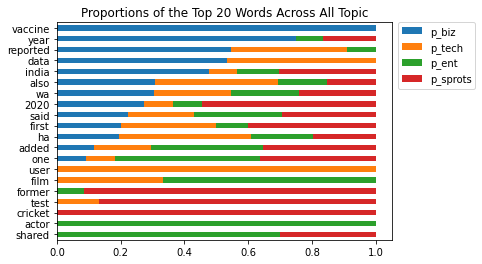

In [13]:
# visualize the percentage topic percentage make up of each word
plt.figure(figsize=(20,14))
(word_counts.assign(p_biz = word_counts.biz/word_counts['all'], 
                   p_tech = word_counts.tech/word_counts['all'],
                   p_ent = word_counts.ent/word_counts['all'],
                   p_sprots = word_counts.sprots/word_counts['all'])
 .sort_values(by='all')[['p_biz', 'p_tech', 'p_ent', 'p_sprots']]
 .tail(20)
 .sort_values('p_biz')
 .plot.barh(stacked=True)
)

plt.title("Proportions of the Top 20 Words Across All Topic")
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.show()

## Wordcloud

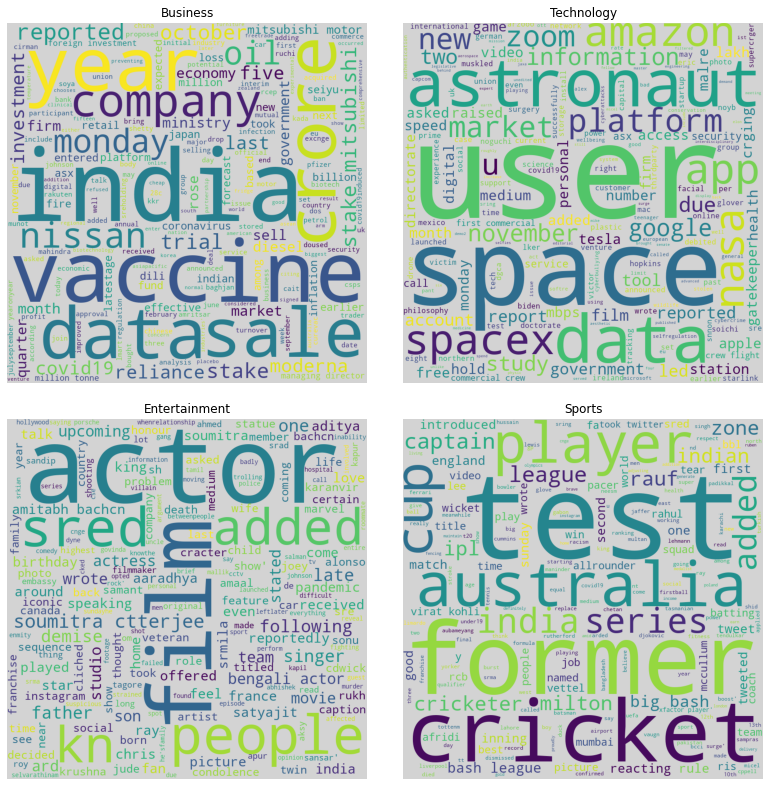

In [14]:
from wordcloud import WordCloud

# create wordcloud objects for each topic 
biz_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(business_words)

tech_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(technology_words)

ent_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(entertainment_words)

sport_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(sports_words)

# Plot each word cloud
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5]), plt.axes([.25, .45, .5, .5]), plt.axes([.8, .45, .5, .5])]

# imshow => display data as an image
axs[0].imshow(biz_cloud)
axs[1].imshow(tech_cloud)
axs[2].imshow(ent_cloud)
axs[3].imshow(sport_cloud)

axs[0].set_title('Business')
axs[1].set_title('Technology')
axs[2].set_title('Entertainment')
axs[3].set_title('Sports')

for ax in axs: ax.axis('off')

In [15]:
# create bigram and trigram columns by counting the number of pairs of each doc
news_df['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in news_df.words]
news_df['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in news_df.words]
news_df

,topic,content,clean,stemmed,lemmatized,text_filtered,words,doc_length,bigrams,trigrams
0,business,American biotechnology company Moderna on Mond...,american biotechnology company moderna monday ...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo...",39,"[(american, biotechnology), (biotechnology, co...","[(american, biotechnology, company), (biotechn..."
1,business,Fifteen Asia-Pacific countries signed the Regi...,fifteen asiapacific countries signed regional ...,fifteen asia-pacif countri sign the region com...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region...",44,"[(fifteen, asiapacific), (asiapacific, country...","[(fifteen, asiapacific, country), (asiapacific..."
2,business,Moderna's initial results of late-stage trial ...,moderna ' initial results latestage trial show...,moderna' initi result of late-stag trial show ...,moderna's initial result of latestage trial sh...,moderna's initial result latestage trial show ...,"[modernas, initial, result, latestage, trial, ...",38,"[(modernas, initial), (initial, result), (resu...","[(modernas, initial, result), (initial, result..."
3,business,Reliance Industries' retail arm Reliance Retai...,reliance industries ' retail arm reliance reta...,relianc industries' retail arm relianc retail ...,reliance industries' retail arm reliance retai...,reliance industries' retail arm reliance retai...,"[reliance, industries, retail, arm, reliance, ...",43,"[(reliance, industries), (industries, retail),...","[(reliance, industries, retail), (industries, ..."
4,business,The I&B Ministry on Monday asked digital media...,ib ministry monday asked digital media compani...,the i&b ministri on monday ask digit media com...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,...",38,"[(ib, ministry), (ministry, monday), (monday, ...","[(ib, ministry, monday), (ministry, monday, as..."
...,...,...,...,...,...,...,...,...,...,...
94,entertainment,Speaking about his cameo in Akshay Kumar-starr...,speaking cameo akshay kumarstarrer ' laxmii ' ...,speak about hi cameo in akshay kumar-starr 'la...,speaking about his cameo in akshay kumarstarre...,speaking cameo aksy kumarstarrer 'laxmii' acto...,"[speaking, cameo, akshay, kumarstarrer, laxmii...",34,"[(speaking, cameo), (cameo, akshay), (akshay, ...","[(speaking, cameo, akshay), (cameo, akshay, ku..."
95,entertainment,Following the demise of Bengali actor Soumitra...,following demise bengali actor soumitra chatte...,follow the demis of bengali actor soumitra cha...,following the demise of bengali actor soumitra...,following demise bengali actor soumitra ctterj...,"[following, demise, bengali, actor, soumitra, ...",40,"[(following, demise), (demise, bengali), (beng...","[(following, demise, bengali), (demise, bengal..."
96,entertainment,The team of Keanu Reeves' upcoming film 'The M...,team keanu reeves ' upcoming film ' matrix 4 '...,the team of keanu reeves' upcom film 'the matr...,the team of keanu reeves' upcoming film 'the m...,team keanu reeves' upcoming film 'the matrix 4...,"[team, keanu, reeves, upcoming, film, the, mat...",38,"[(team, keanu), (keanu, reeves), (reeves, upco...","[(team, keanu, reeves), (keanu, reeves, upcomi..."
97,entertainment,Following veteran Bengali actor Soumitra Chatt...,following veteran bengali actor soumitra chatt...,follow veteran bengali actor soumitra chatterj...,following veteran bengali actor soumitra chatt...,following veteran bengali actor soumitra ctter...,"[following, veteran, bengali, actor, soumitra,...",38,"[(following, veteran), (veteran, bengali), (be...","[(following, veteran, bengali), (veteran, beng..."


In [16]:
# for each topic, create a bigram of the top 20 occurances
biz_bigrams = pd.Series(list(nltk.ngrams(business_words.split(), 2))).value_counts().head(20)
tehc_bigrams = pd.Series(list(nltk.ngrams(technology_words.split(), 2))).value_counts().head(20)
ent_bigrams =  pd.Series(list(nltk.ngrams(entertainment_words.split(), 2))).value_counts().head(20)
sport_bigrams = pd.Series(list(nltk.ngrams(sports_words.split(), 2))).value_counts().head(20)

biz_bigrams

(stake, mitsubishi)       5
(mitsubishi, motor)       4
(next, year)              3
(foreign, investment)     3
(managing, director)      3
(coronavirus, vaccine)    3
(million, tonne)          3
(72000, crore)            2
(945, effective)          2
(covid19, vaccine)        2
(34, stake)               2
(mutual, fund)            2
(oil, india)              2
(reliance, retail)        2
(latestage, trial)        2
(baghjan, oil)            2
(india, limited)          2
(trial, moderna's)        2
(ministry, monday)        2
(vaccine, 945)            2
dtype: int64

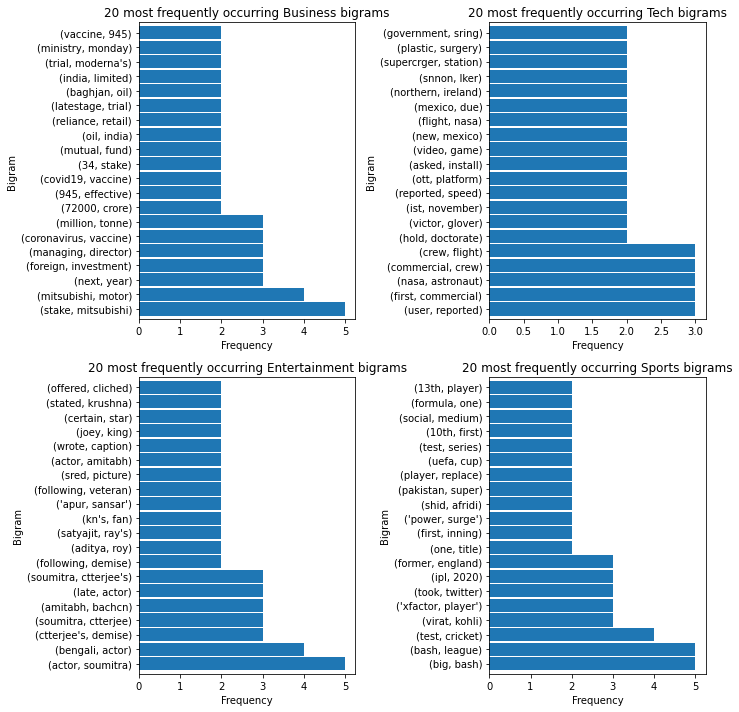

In [17]:
# Plot each topic's bigram to see if there is overlap

plt.figure(figsize=(20,10))
plt.subplot(221)
biz_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Business bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(222)
tehc_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Tech bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(223)
ent_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Entertainment bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(224)
sport_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Sports bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')


plt.tight_layout()
plt.show()


In [18]:
# create a trigram for each topic for the top 30 tiplets
biz_trigrams = pd.Series(list(nltk.ngrams(business_words.split(), 3))).value_counts().head(30)
tehc_trigrams = pd.Series(list(nltk.ngrams(technology_words.split(), 3))).value_counts().head(30)
ent_trigrams =  pd.Series(list(nltk.ngrams(entertainment_words.split(), 3))).value_counts().head(30)
sport_trigrams = pd.Series(list(nltk.ngrams(sports_words.split(), 3))).value_counts().head(30)

biz_trigrams

(stake, mitsubishi, motor)                     4
(vaccine, 945, effective)                      2
(petrol, diesel, car)                          2
(sell, stake, mitsubishi)                      2
(foreign, investment, 26)                      2
(baghjan, oil, well)                           2
(oil, india, limited)                          2
(34, stake, mitsubishi)                        2
(9758, million, reuters)                       1
(september, 212, october)                      1
(five, year, ahead)                            1
(initiated, travel, restriction)               1
(2030, reported, financial)                    1
(dili, arrived, amritsar)                      1
(reported, nissan, could)                      1
(form, nasal, drop)                            1
(2020, 226, data)                              1
(came, due, loss)                              1
(asx, forced, lt)                              1
(economy, exited, covid19induced)              1
(cause, resolution, 

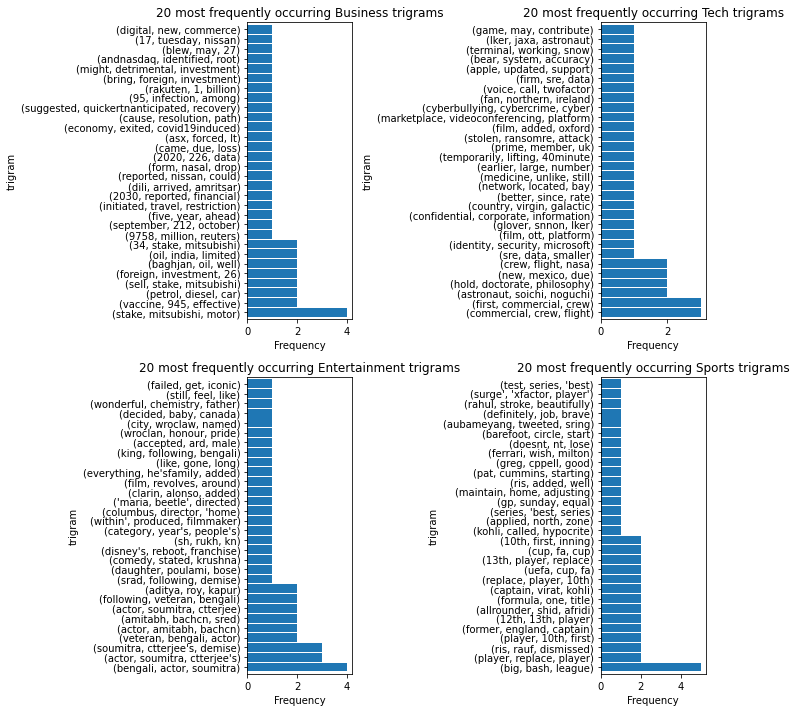

In [19]:
# Plot the graphs for each trigram to see if there is overlap

plt.figure(figsize=(20,10))
plt.subplot(221)
biz_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Business trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(222)
tehc_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Tech trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(223)
ent_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Entertainment trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(224)
sport_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Sports trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')


plt.tight_layout()
plt.show()


# Blogs
Explore the blog articles using the techniques discussed in the exploration lesson.



In [20]:
blogs = prepare.prep_blogs()
blogs

,title,content,clean,stemmed,lemmatized
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,rumors true time arrived codeup officially ope...,the rumor are true! the time ha arrived. codeu...,the rumor are true the time ha arrived codeup ...
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,dimitri antoniou maggie giust data science big...,By dimitri antoni and maggi giust data science...,by dimitri antoniou and maggie giust data scie...
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",dimitri antoniou week ago codeup launched imme...,"By dimitri antoni A week ago, codeup launch ou...",by dimitri antoniou a week ago codeup launched...
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair third biannual san antonio te...,SA tech job fair the third bi-annu san antonio...,sa tech job fair the third biannual san antoni...
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps closing model danger prog...,competitor bootcamp are closing. Is the model ...,competitor bootcamps are closing is the model ...


In [21]:
# Create a new column by using remove_stopwords stop words fuction on the lemmatized column
blogs['text_filtered'] = blogs.lemmatized.apply(prepare.remove_stopwords)

In [22]:
# create a words object that drops any single characters and isn't a letter
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in blogs.text_filtered]

In [23]:
# column name will be words, and the column will contain lists of the words in each doc
# concat it on the blogs
blogs = pd.concat([blogs, pd.DataFrame({'words': words})], axis=1)
blogs

,title,content,clean,stemmed,lemmatized,text_filtered,words
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,rumors true time arrived codeup officially ope...,the rumor are true! the time ha arrived. codeu...,the rumor are true the time ha arrived codeup ...,rumor true time ha arrived codeup ha officiall...,"[rumor, true, time, ha, arrived, codeup, ha, o..."
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,dimitri antoniou maggie giust data science big...,By dimitri antoni and maggi giust data science...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien..."
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",dimitri antoniou week ago codeup launched imme...,"By dimitri antoni A week ago, codeup launch ou...",by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche..."
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair third biannual san antonio te...,SA tech job fair the third bi-annu san antonio...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an..."
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps closing model danger prog...,competitor bootcamp are closing. Is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger..."


In [24]:
# Create a catagory variable for ds or other where ds = contains data science in the title and other does not contain Data Science
blogs['type'] = blogs['title'].str.contains('Data Science').replace({True:'ds', False:'other'})
blogs


,title,content,clean,stemmed,lemmatized,text_filtered,words,type
0,Codeup’s Data Science Career Accelerator is Here!,The rumors are true! The time has arrived. Cod...,rumors true time arrived codeup officially ope...,the rumor are true! the time ha arrived. codeu...,the rumor are true the time ha arrived codeup ...,rumor true time ha arrived codeup ha officiall...,"[rumor, true, time, ha, arrived, codeup, ha, o...",ds
1,Data Science Myths,By Dimitri Antoniou and Maggie Giust\nData Sci...,dimitri antoniou maggie giust data science big...,By dimitri antoni and maggi giust data science...,by dimitri antoniou and maggie giust data scie...,dimitri antoniou maggie giust data science big...,"[dimitri, antoniou, maggie, giust, data, scien...",ds
2,Data Science VS Data Analytics: What’s The Dif...,"By Dimitri Antoniou\nA week ago, Codeup launch...",dimitri antoniou week ago codeup launched imme...,"By dimitri antoni A week ago, codeup launch ou...",by dimitri antoniou a week ago codeup launched...,dimitri antoniou week ago codeup launched imme...,"[dimitri, antoniou, week, ago, codeup, launche...",ds
3,10 Tips to Crush It at the SA Tech Job Fair,SA Tech Job Fair\nThe third bi-annual San Anto...,sa tech job fair third biannual san antonio te...,SA tech job fair the third bi-annu san antonio...,sa tech job fair the third biannual san antoni...,sa tech job fair third biannual san antonio te...,"[sa, tech, job, fair, third, biannual, san, an...",other
4,Competitor Bootcamps Are Closing. Is the Model...,Competitor Bootcamps Are Closing. Is the Model...,competitor bootcamps closing model danger prog...,competitor bootcamp are closing. Is the model ...,competitor bootcamps are closing is the model ...,competitor bootcamps closing model danger prog...,"[competitor, bootcamps, closing, model, danger...",other


In [25]:
# create series objects for each topic that is a string of words joined on spaces to make it 1 continious string  
ds_words = ' '.join(blogs[blogs.type=='ds'].text_filtered)
other_words = ' '.join(blogs[blogs.type=='other'].text_filtered)
all_words = ' '.join(blogs.text_filtered)

ds_words

'rumor true time ha arrived codeup ha officially opened application new data science career accelerator 25 seat available immersive program one kind san antonio help land job glassdoors 1 best job america data science method providing actionable intelligence data data revolution ha hit san antonio resulting explosion data scientist position across company like usaa accenture booz allen hamilton heb weve even seen utsa invest 70 cybersecurity center school data science built program specifically meet growing demand industry program 18 week long fulltime handson projectbased curriculum development instruction led senior data scientist maggie giust ha worked heb capital group rackspace along input dozen practitioner hiring partner student work real data set realistic problem entire data science pipeline collection deployment receive professional development training resume writing interviewing continuing education prepare smooth transition workforce focus applied data science immediate im

In [26]:
# For each topic find out how many times each word happens and put that into a topic_freq obj.
all_freq = pd.Series(all_words.split()).value_counts()
ds_freq = pd.Series(ds_words.split()).value_counts()
other_freq = pd.Series(other_words.split()).value_counts()

ds_freq

data           75
science        26
learning       19
machine        14
scientist      13
               ..
particular      1
conduct         1
partnership     1
storing         1
usable          1
Length: 520, dtype: int64

In [27]:
other_freq

company      16
model        12
job          12
education     9
fair          9
             ..
technical     1
aka           1
starting      1
level         1
find          1
Length: 398, dtype: int64

In [28]:
# Combine all the series together into a single data frame to see the word count across all topics
word_counts = (pd.concat([all_freq, ds_freq, other_freq], axis=1, sort=True)
               .set_axis(['all', 'ds', 'other'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.head()

,all,ds,other
1,3,3,0
10,3,1,2
10th,1,0,1
11,1,1,0
12,1,1,0


Since we've split the data sceience from the other aritlces we will remove data and science from the word list

In [30]:
# Remove the words from the filtered text 
blogs.text_filtered = blogs.text_filtered.str.replace('data', '')
blogs.text_filtered = blogs.text_filtered.str.replace('science', '')

# then recreate the word lists for each topic
ds_words = ' '.join(blogs[blogs.type=='ds'].text_filtered)
other_words = ' '.join(blogs[blogs.type=='other'].text_filtered)
all_words = ' '.join(blogs.text_filtered)

# and recreate the freq lists and data frame to look at the new freq
all_freq = pd.Series(all_words.split()).value_counts()
ds_freq = pd.Series(ds_words.split()).value_counts()
other_freq = pd.Series(other_words.split()).value_counts()


# Combine all the series together into a single data frame to see the word count across all topics
word_counts = (pd.concat([all_freq, ds_freq, other_freq], axis=1, sort=True)
               .set_axis(['all', 'ds', 'other'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

<Figure size 1440x1008 with 0 Axes>

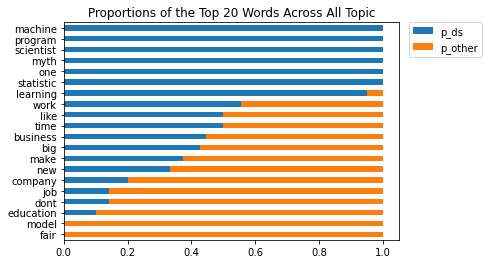

In [31]:
# visualize the percentage topic percentage make up of each word
plt.figure(figsize=(20,14))
(word_counts.assign(p_ds = word_counts.ds/word_counts['all'], 
                   p_other = word_counts.other/word_counts['all'])
 .sort_values(by='all')[['p_ds', 'p_other']]
 .tail(20)
 .sort_values('p_ds')
 .plot.barh(stacked=True)
)

plt.title("Proportions of the Top 20 Words Across All Topic")
plt.legend(bbox_to_anchor=(1.25, 1),borderaxespad=0)
plt.show()

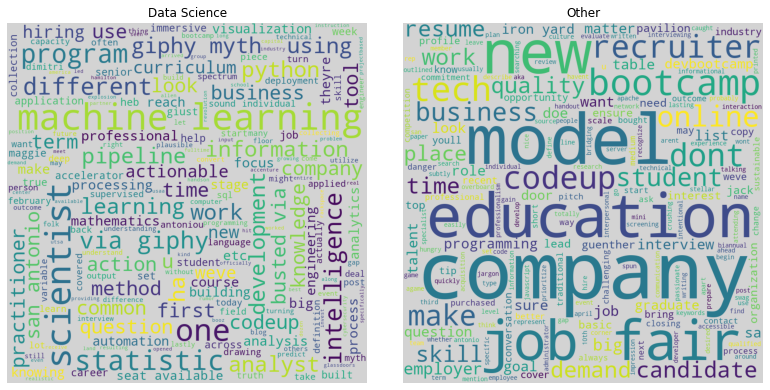

In [38]:
from wordcloud import WordCloud

# create wordcloud objects for each topic 
ds_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(ds_words)

other_cloud = WordCloud(background_color='lightgray', 
                      height=800, width=800).generate(other_words)
# Plot each word cloud
plt.figure(figsize=(10,10))
axs = [plt.axes([.25, 1, .5, .5]), plt.axes([.8, 1, .5, .5])]

# imshow => display data as an image
axs[0].imshow(ds_cloud)
axs[1].imshow(other_cloud)

axs[0].set_title('Data Science')
axs[1].set_title('Other')


for ax in axs: ax.axis('off')

In [39]:
# create bigram and trigram columns by counting the number of pairs of each doc
blogs['bigrams'] = [list(nltk.ngrams(wordlist, 2)) for wordlist in blogs.words]
blogs['trigrams'] = [list(nltk.ngrams(wordlist, 3)) for wordlist in blogs.words]
news_df

,topic,content,clean,stemmed,lemmatized,text_filtered,words,doc_length,bigrams,trigrams
0,business,American biotechnology company Moderna on Mond...,american biotechnology company moderna monday ...,american biotechnolog compani moderna on monda...,american biotechnology company moderna on mond...,american biotechnology company moderna monday ...,"[american, biotechnology, company, moderna, mo...",39,"[(american, biotechnology), (biotechnology, co...","[(american, biotechnology, company), (biotechn..."
1,business,Fifteen Asia-Pacific countries signed the Regi...,fifteen asiapacific countries signed regional ...,fifteen asia-pacif countri sign the region com...,fifteen asiapacific country signed the regiona...,fifteen asiapacific country signed regional co...,"[fifteen, asiapacific, country, signed, region...",44,"[(fifteen, asiapacific), (asiapacific, country...","[(fifteen, asiapacific, country), (asiapacific..."
2,business,Moderna's initial results of late-stage trial ...,moderna ' initial results latestage trial show...,moderna' initi result of late-stag trial show ...,moderna's initial result of latestage trial sh...,moderna's initial result latestage trial show ...,"[modernas, initial, result, latestage, trial, ...",38,"[(modernas, initial), (initial, result), (resu...","[(modernas, initial, result), (initial, result..."
3,business,Reliance Industries' retail arm Reliance Retai...,reliance industries ' retail arm reliance reta...,relianc industries' retail arm relianc retail ...,reliance industries' retail arm reliance retai...,reliance industries' retail arm reliance retai...,"[reliance, industries, retail, arm, reliance, ...",43,"[(reliance, industries), (industries, retail),...","[(reliance, industries, retail), (industries, ..."
4,business,The I&B Ministry on Monday asked digital media...,ib ministry monday asked digital media compani...,the i&b ministri on monday ask digit media com...,the ib ministry on monday asked digital medium...,ib ministry monday asked digital medium compan...,"[ib, ministry, monday, asked, digital, medium,...",38,"[(ib, ministry), (ministry, monday), (monday, ...","[(ib, ministry, monday), (ministry, monday, as..."
...,...,...,...,...,...,...,...,...,...,...
94,entertainment,Speaking about his cameo in Akshay Kumar-starr...,speaking cameo akshay kumarstarrer ' laxmii ' ...,speak about hi cameo in akshay kumar-starr 'la...,speaking about his cameo in akshay kumarstarre...,speaking cameo aksy kumarstarrer 'laxmii' acto...,"[speaking, cameo, akshay, kumarstarrer, laxmii...",34,"[(speaking, cameo), (cameo, akshay), (akshay, ...","[(speaking, cameo, akshay), (cameo, akshay, ku..."
95,entertainment,Following the demise of Bengali actor Soumitra...,following demise bengali actor soumitra chatte...,follow the demis of bengali actor soumitra cha...,following the demise of bengali actor soumitra...,following demise bengali actor soumitra ctterj...,"[following, demise, bengali, actor, soumitra, ...",40,"[(following, demise), (demise, bengali), (beng...","[(following, demise, bengali), (demise, bengal..."
96,entertainment,The team of Keanu Reeves' upcoming film 'The M...,team keanu reeves ' upcoming film ' matrix 4 '...,the team of keanu reeves' upcom film 'the matr...,the team of keanu reeves' upcoming film 'the m...,team keanu reeves' upcoming film 'the matrix 4...,"[team, keanu, reeves, upcoming, film, the, mat...",38,"[(team, keanu), (keanu, reeves), (reeves, upco...","[(team, keanu, reeves), (keanu, reeves, upcomi..."
97,entertainment,Following veteran Bengali actor Soumitra Chatt...,following veteran bengali actor soumitra chatt...,follow veteran bengali actor soumitra chatterj...,following veteran bengali actor soumitra chatt...,following veteran bengali actor soumitra ctter...,"[following, veteran, bengali, actor, soumitra,...",38,"[(following, veteran), (veteran, bengali), (be...","[(following, veteran, bengali), (veteran, beng..."


In [40]:
# for each topic, create a bigram of the top 20 occurances
ds_bigrams = pd.Series(list(nltk.ngrams(ds_words.split(), 2))).value_counts().head(20)
other_bigrams = pd.Series(list(nltk.ngrams(other_words.split(), 2))).value_counts().head(20)


ds_bigrams

(machine, learning)           14
(via, giphy)                   6
(giphy, myth)                  5
(san, antonio)                 4
(busted, via)                  4
(seat, available)              3
(25, seat)                     3
(building, automation)         2
(one, common)                  2
(predict, future)              2
(question, reach)              2
(reach, u)                     2
(still, question)              2
(company, using)               2
(actionable, intelligence)     2
(future, event)                2
(action, building)             2
(deep, learning)               2
(senior, scientist)            2
(python, r)                    2
dtype: int64

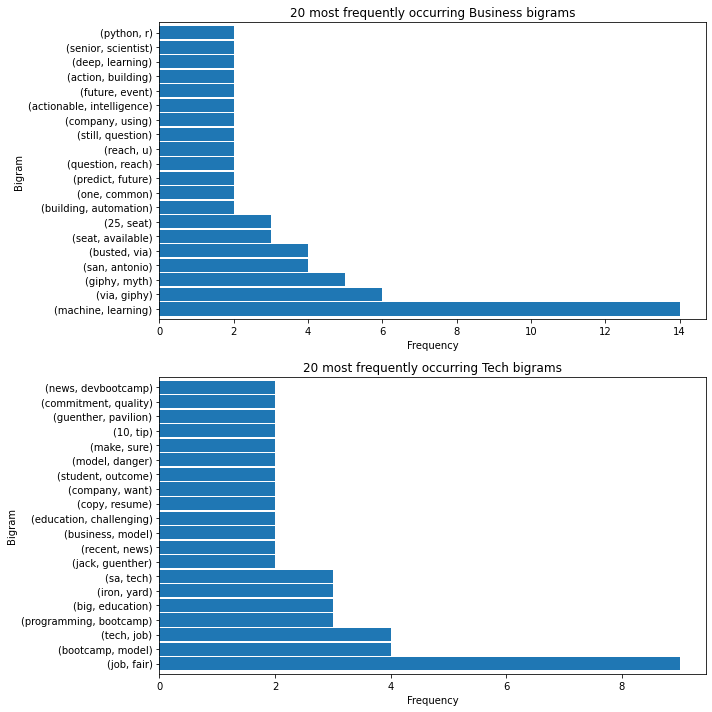

In [41]:
# Plot each topic's bigram to see if there is overlap

plt.figure(figsize=(20,10))
plt.subplot(211)
ds_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Business bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.subplot(212)
other_bigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Tech bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

In [42]:
# create a trigram for each topic for the top 30 tiplets
ds_trigrams = pd.Series(list(nltk.ngrams(ds_words.split(), 3))).value_counts().head(30)
other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3))).value_counts().head(30)

ds_trigrams

(via, giphy, myth)                   5
(busted, via, giphy)                 4
(25, seat, available)                3
(company, using, term)               2
(question, reach, u)                 2
(supervised, machine, learning)      2
(person, company, using)             2
(action, building, automation)       2
(still, question, reach)             2
(predict, future, event)             2
(decision, present, practitioner)    1
(2, applied, statistic)              1
(veteran, first, responder)          1
(program, 18, week)                  1
(existing, web, dev)                 1
(learn, python, r)                   1
(machine, learning, clustering)      1
(category, may, actually)            1
(san, antonio, resulting)            1
(inclusive, growth, scholarship)     1
(learning, path, gap)                1
(giphy, myth, 3)                     1
(fact, magical, unicorn)             1
(teach, different, thing)            1
(refers, set, large)                 1
(python, without, underst

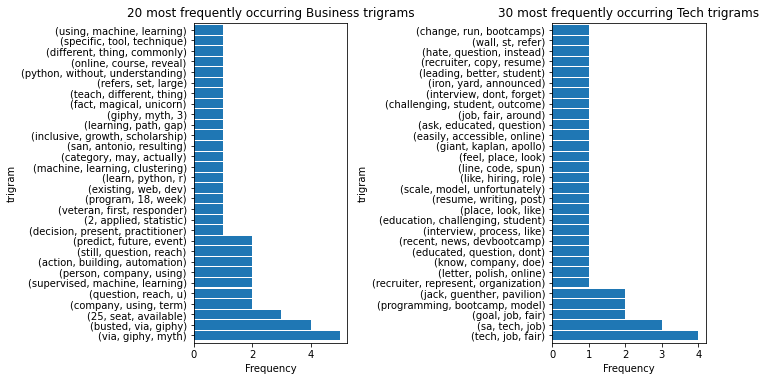

In [44]:
# Plot the graphs for each trigram to see if there is overlap

plt.figure(figsize=(20,10))
plt.subplot(221)
ds_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('20 most frequently occurring Business trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')

plt.subplot(222)
other_trigrams.plot.barh(width=.9, figsize=(10, 10))
plt.title('30 most frequently occurring Tech trigrams')
plt.ylabel('trigram')
plt.xlabel('Frequency')


plt.tight_layout()
plt.show()